In [ ]:
#Import The Necassary Library 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
#Import The Library From NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# For uploading  the Dataset
data = pd.read_csv('/content/drive/MyDrive/project/Dataset/ResumeDataSet.csv',encoding='utf-8')
data.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [ ]:
#Check the shape 
print ('Shape = >',data.shape)

Shape = > (962, 2)


In [ ]:
#Count that How Many spam and Not spam
print ('Category-Wise','\n',data['Category'].value_counts())

Category-Wise 
 Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Operations Manager           40
Data Science                 40
ETL Developer                40
Sales                        40
Blockchain                   40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [ ]:
#Check the Null Values of each rows in the dataset
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
#ADD the Length Coulmn for Messsage Length
data['R_length'] = data['Resume'].str.len()
data.head(2)

,Category,Resume,R_length
0,Data Science,Skills * Programming Languages: Python (pandas...,4786
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,1268


**visualize the number of categories in the dataset:**

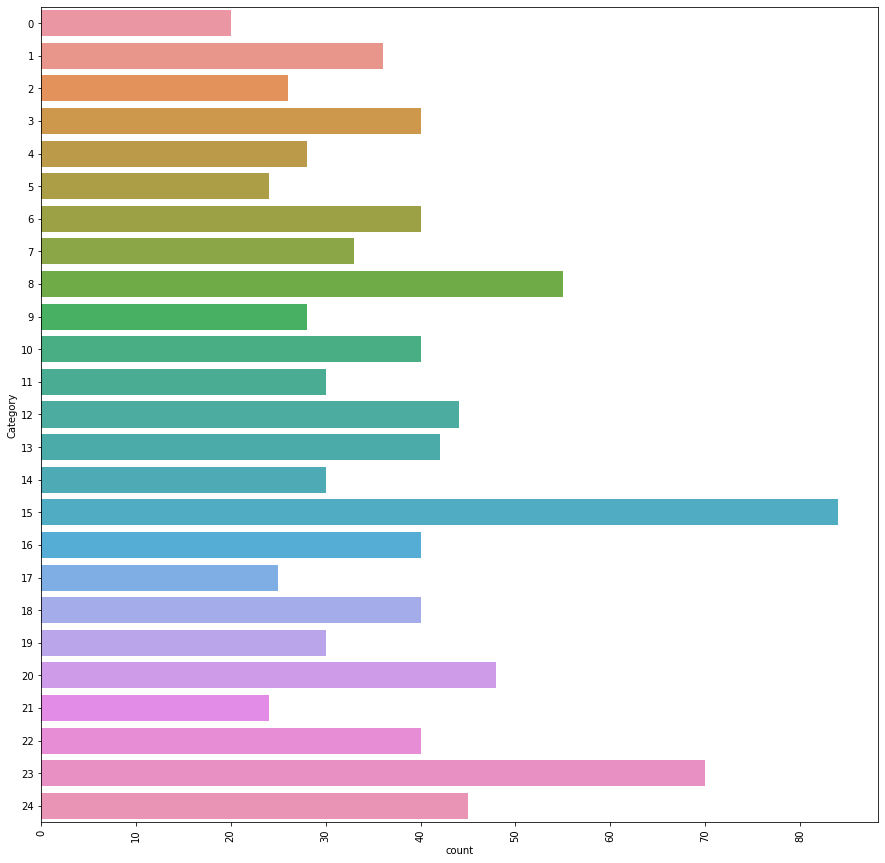

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

In [ ]:
#Remove the Accent For the Resume Column 
from unicodedata import normalize
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
data['Resume'] = data['Resume'].apply(remove_accent)

In [ ]:
#Remove the Punctution 
data['Resume']= data['Resume'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
data['Resume'] = data['Resume'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
data['Resume'] = data['Resume'].str.replace(r'£|\$', 'dollers')
data['Resume'] = data['Resume'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
data['Resume'] = data['Resume'].str.replace(r'\d+(\.\d+)?', 'numbr')
data['Resume'] = data['Resume'].str.replace(r'[^\w\d\s]', ' ')
data['Resume'] = data['Resume'].str.replace(r'\s+', ' ')
data['Resume'] = data['Resume'].str.replace(r'^\s+|\s+?$', '')

In [ ]:
#For Message
import string
from nltk.corpus import  stopwords
#Remove the Stopwords And We Also Those Stopwards That We Want To ADD On The Stopward List 
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure',''])
data['Resume']= data['Resume'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [ ]:
#ADD the clean_Length_of_Headine Coulmn of Headline  Articel length That Show Each Article Length OF Headline   After Pre-Processing The Each Article
data['clean_length_R'] = data.Resume.str.len()
data.head()

,Category,Resume,R_length,clean_length_R
0,Data Science,Skills Programming Languages Python pandas num...,4786,4022
1,Data Science,Education Details May numbr May numbr B E UIT ...,1268,1078
2,Data Science,Areas Interest Deep Learning Control System De...,1871,1590
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6995,5959
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...,452,397


In [ ]:
#Check Th Length of News Each Article Of News Column Before 
print ('Original_Length', data.R_length.sum())
#Check Th Length of News Each Article Of News Column After 
print ('Clean_Length', data.clean_length_R.sum())

Original_Length 3040271
Clean_Length 2536127


In [ ]:
totalWords =[]
Sentences = data['Resume'].values

In [ ]:
for i in range(0,962):
  requiredWords = nltk.word_tokenize(Sentences[i])
  for word in requiredWords:
    if word not in stop_words and word not in string.punctuation:
      totalWords.append(word)

In [ ]:
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('numbr', 13495), ('Exprience', 3829), ('months', 3233), ('company', 3120), ('Details', 2967), ('description', 2634), ('Project', 1808), ('project', 1579), ('data', 1434), ('team', 1420), ('Maharashtra', 1385), ('A', 1318), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('SQL', 990), ('Management', 990), ('Ltd', 934), ('management', 927), ('C', 867), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632), ('Technologies', 627), ('work', 622)]


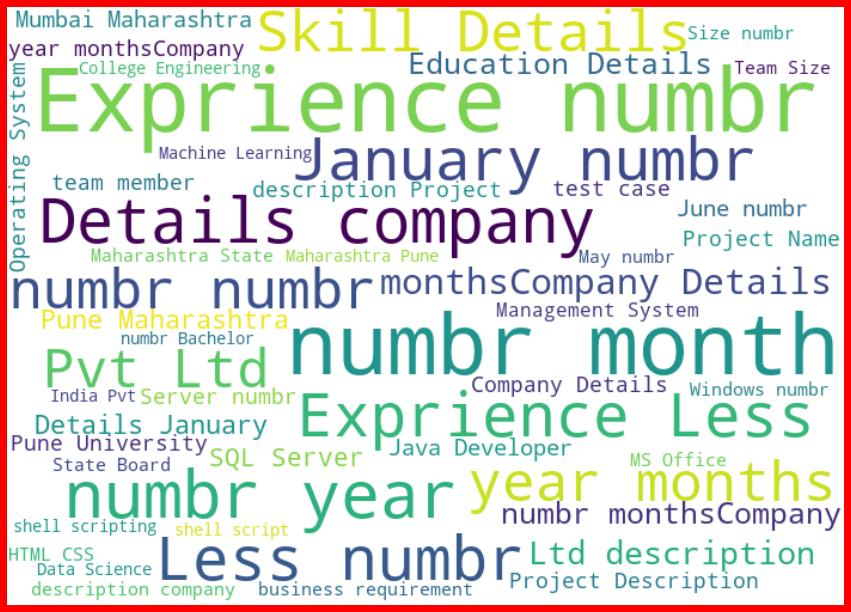

In [ ]:
cleanedSentences = ""
for i in range(0,962):
  cleanedText = Sentences[i]
  cleanedSentences += cleanedText

# Word Cloud  displays a list of words, the importance of each being shown with font size or color Of the news column of Not Fake 
from wordcloud import WordCloud
wc = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(cleanedSentences)
plt.figure(figsize=(15,15),facecolor='r')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#convert these words into categorical values
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [ ]:
data.head(2)

,Category,Resume,R_length,clean_length_R
0,6,Skills Programming Languages Python pandas num...,4786,4022
1,6,Education Details May numbr May numbr B E UIT ...,1268,1078


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['Resume'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [ ]:
# train a model for the task of Resume Screening
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
         

In [ ]:
clf1 = OneVsRestClassifier(MultinomialNB())
clf1.fit(X_train, y_train)
prediction = clf1.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf1.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf1.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf1, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00   